In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
data = pd.read_csv("data.csv")
# remove columns with name ending in __MIN or __MAX
selected_cols = [
    col
    for col in data.columns
    if not col.endswith("__MIN")
    and not col.endswith("__MAX")
    and not col.endswith("_step")
]
data = data.loc[:, selected_cols]

print(f"Data columns: {data.columns}")

Data columns: Index(['step', '(dion+lion)_bs=1024_lr=0.01_sp=0.25_retry - val/loss',
       '(dion2+lion)_bs=1024_lr=0.01_sp=0.0078125_sp2=0.25_mu1=0.999_mu2=0.95_delay=False_no_delay_lion - val/loss',
       '(dion2+lion)_bs=1024_lr=0.01_sp=0.0078125_sp2=0.25_mu1=0.999_mu2=0.95_delay=True_no_delay_lion - val/loss',
       '(demo+demo)_bs=1024_lr=0.001_sp=0.0078125_baseline - val/loss',
       '(demo_delay+demo_delay)_bs=1024_lr=0.001_sp=0.0078125_baseline - val/loss',
       '(dion+lion)_bs=1024_lr=0.01_sp=0.0078125_baseline - val/loss'],
      dtype='object')


In [77]:
def get_column(data, name):
    col_name = [x for x in data.columns if name in x]
    assert len(col_name) == 1, f"Column {name} not found"
    return data[col_name[0]].values


step = get_column(data, "step")
dion_4 = get_column(data, "(dion+lion)_bs=1024_lr=0.01_sp=0.25")
dion_128 = get_column(data, "(dion+lion)_bs=1024_lr=0.01_sp=0.0078125")
dion2_128 = get_column(
    data,
    "(dion2+lion)_bs=1024_lr=0.01_sp=0.0078125_sp2=0.25_mu1=0.999_mu2=0.95_delay=False",
)
dion2_128_delay = get_column(
    data,
    "(dion2+lion)_bs=1024_lr=0.01_sp=0.0078125_sp2=0.25_mu1=0.999_mu2=0.95_delay=True",
)
demo = get_column(data, "(demo+demo)")
demo_delay = get_column(data, "(demo_delay+demo_delay)")

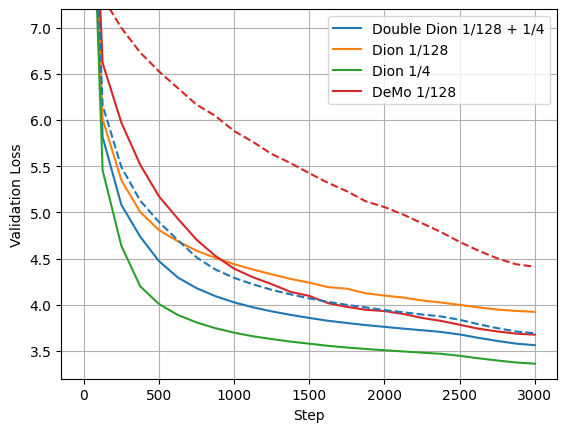

In [78]:
plt.plot(step, dion2_128, label="Double Dion 1/128 + 1/4")
plt.plot(step, dion_128, label="Dion 1/128")
plt.plot(step, dion_4, label="Dion 1/4")
plt.plot(step, demo, label="DeMo 1/128")
plt.plot(step, dion2_128_delay, color="C0", linestyle="--")
plt.plot(step, demo_delay, color="C3", linestyle="--")

plt.ylim(3.2, 7.2)
plt.xlabel("Step")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()
plt.show()

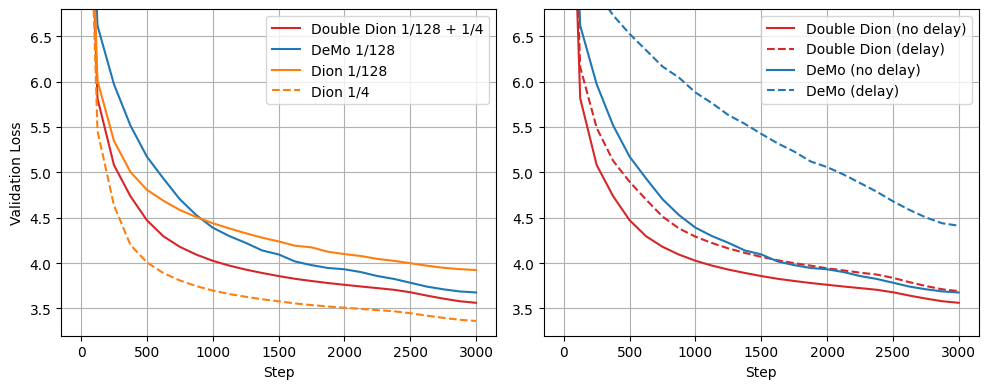

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(step, dion2_128, color="C3", label="Double Dion 1/128 + 1/4")
ax[0].plot(step, demo, color="C0", label="DeMo 1/128")
ax[0].plot(step, dion_128, color="C1", label="Dion 1/128")
ax[0].plot(step, dion_4, color="C1", label="Dion 1/4", linestyle="--")

ax[1].plot(step, dion2_128, color="C3", label="Double Dion (no delay)")
ax[1].plot(
    step, dion2_128_delay, color="C3", linestyle="--", label="Double Dion (delay)"
)
ax[1].plot(step, demo, color="C0", label="DeMo (no delay)")
ax[1].plot(step, demo_delay, color="C0", linestyle="--", label="DeMo (delay)")

ax[0].set_ylim(3.2, 6.8)
ax[1].set_ylim(3.2, 6.8)

ax[0].set_ylabel("Validation Loss")
ax[0].set_xlabel("Step")
ax[0].grid()
ax[0].legend()
ax[1].set_xlabel("Step")
ax[1].grid()
ax[1].legend()

plt.tight_layout()
plt.savefig("double_dion.pdf")
plt.show()